# Census Income Project

<hr style = "height: 1px">

**PROBLEM STATEMENT**

After having sufficient knowledge about the attributes, you will perform a predictive task of classification to predict whether an individual makes over 50,000 a year or less by using different machine learning algorithms.

<hr style = "height: 1px">

In [1]:
# Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

<hr style = "height: 1px">

# Exploratory Data Analysis

EDA involves a number of different steps to help us understand the characteristics of the dataset. Following this, the data is cleaned which ensures the data is well structured and free from issues such as outliers and missing values. EDA is also used to create visualizations are such as boxplots and correlation heatmaps which help in the subsequent model building steps.<br>

These steps are carried out below:

<hr style = "height: 1px">

**LOADING AND ANALYSING THE DATASET**

<hr style = "height: 1px">

In [2]:
# Load and read the dataset
df = pd.read_csv("census_income.csv")

In [3]:
# Print the head of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Print the information summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Identify the datatype of the columns
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

<hr style = "height: 1px">

**DATA CLEANING**

<hr style = "height: 1px">


In [6]:
# Find the number of null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [7]:
# Find the number of missing values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [8]:
# Find the number of duplicated values
duplicated_values = df.duplicated().sum()
duplicated_values

24

In [9]:
# Find the percentage of duplicated values
total_values = len(df)
duplicated_percentage = duplicated_values/total_values
duplicated_percentage #  0.07% is insignificant so no duplicated values need to be removed

0.0007370780995669666

In [10]:
# Identify columns which have values that are symbols (not numeric or objects)
columns = []

for i in df.columns:
    values = df[i].unique()
    if '?' in values:
        columns.append(i)

columns

['workclass', 'occupation', 'native-country']

In [11]:
# Replace '?' values with nan
df = df.replace({'?':np.nan})

In [12]:
# Find the number of updated null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [13]:
# Find the percentage of null values in each column
nullvalues_sum = df.isnull().sum()
total_values = len(df)

percentage = (nullvalues_sum/total_values)*100
round(percentage, 2)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
native-country    1.79
annual_income     0.00
dtype: float64

In [14]:
# Find the shape of the dataset before dropping null values
df.shape

(32561, 15)

In [15]:
# Drop the new null values
df.dropna(inplace = True)

In [16]:
# Find the percentage of null values in each column
nullvalues_sum = df.isnull().sum()
total_values = len(df)

percentage = (nullvalues_sum/total_values)*100
round(percentage, 2)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
annual_income     0.0
dtype: float64

In [17]:
# Finding the shape after dropping the null values 
df.shape

(30162, 15)

In [18]:
# What percent of the dataset remains from the original
(30162)*100/32561

92.63229016307852

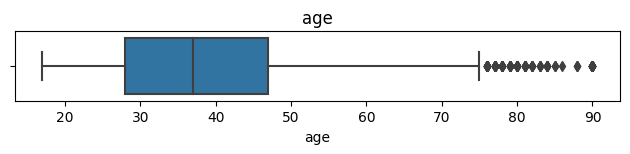

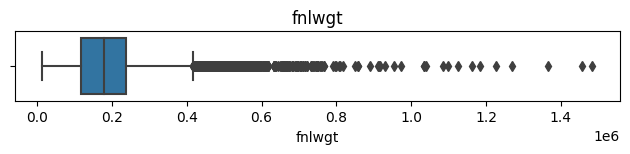

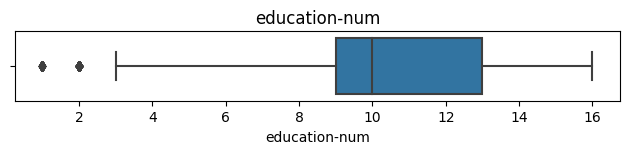

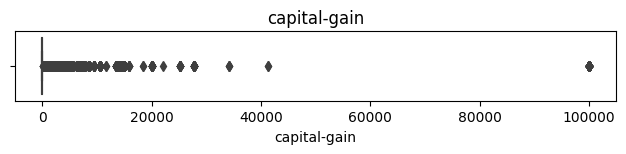

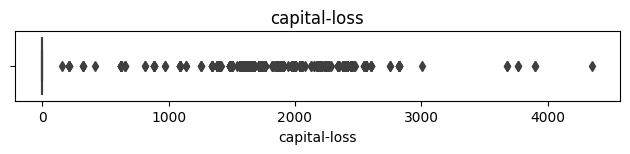

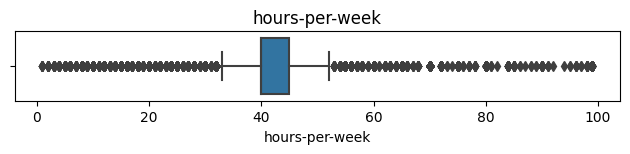

In [19]:
# Find outliers using boxplot
# Exclude object datatype.
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        plt.subplot(5,1,5)
        sns.boxplot(x=df[col], whis=1.5)
        plt.tight_layout()
        plt.title(col)
        plt.show()

In [20]:
# Detection of outliers
outliers = pd.DataFrame()  

for i in df.columns:
    if df[i].dtype!='object':
            Q1=df[i].quantile(0.25)
            Q3=df[i].quantile(0.75)
            IQR=Q3-Q1
            LW=Q1-1.25*IQR
            UW=Q3+1.25*IQR
            outliers= df[(df[i] > UW) | (df[i] < LW)]

In [21]:
# Total number of outliers
outliers.shape

(8125, 15)

In [22]:
# Removing outliers
for i in df.columns:
     if df[i].dtype!='object':
            Q1=df[i].quantile(0.01)
            Q3=df[i].quantile(0.99)
            IQR=Q3-Q1
            UW=Q3+1.5*IQR
            LW=Q1-1.5*IQR
            df=df[(df[i]>=LW) & (df[i]<=UW)]

In [23]:
# Updated dataset without outliers
df.shape

(30008, 15)

In [24]:
# Percentage of values that are 0 in 'capital-loss' and 'capital-gain' columns
results = []

for i in ['capital-gain', 'capital-loss']:
    zeros_count = df[i].value_counts()[0]
    total_count = df[i].value_counts().sum()

    percentage = (zeros_count/total_count)*100

    results.append([i, percentage])

results

[['capital-gain', 92.04212210077313], ['capital-loss', 95.2446014396161]]

In [25]:
# Dropping columns 'capital-gain' and 'capital-loss' due to 92% and 95.2% of their values being 0
df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [26]:
# New shape of the dataset after removing these columns
df.shape

(30008, 13)

<hr style = "height: 1px">

**CORRELATION VISUALISATION**

<hr style = "height: 1px">


In [27]:
# New dataframe with only numeric columns
df_numeric = df.select_dtypes(include='number')

In [28]:
# Correlation between the numeric feature columns
df_numeric.corr()

,age,fnlwgt,education-num,hours-per-week
age,1.000000,-0.077018,0.039963,0.100678
fnlwgt,-0.077018,1.000000,-0.046213,-0.022335
education-num,0.039963,-0.046213,1.000000,0.147936
hours-per-week,0.100678,-0.022335,0.147936,1.000000


<AxesSubplot: >

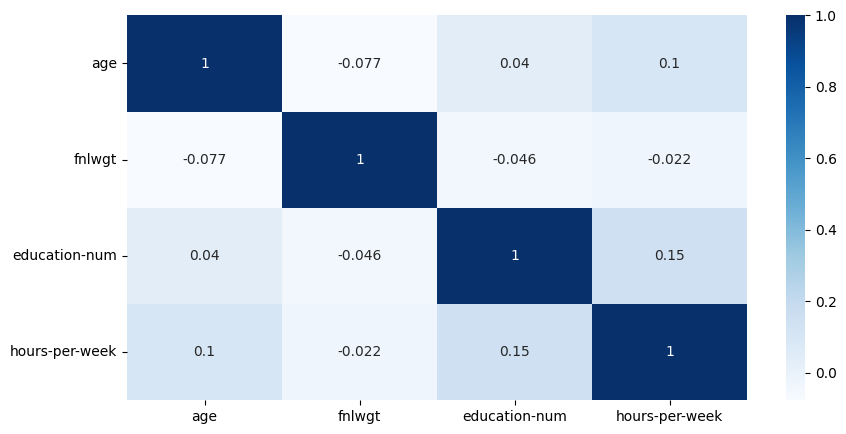

In [29]:
# Visualization of correlation between the numeric feature columns
plt.figure(figsize=(10,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues')

<hr style = "height: 1px">

**LABEL ENCODING**

Label encoding is required to change the categorical variables into numerical for training and testing the model.

<hr style = "height: 1px">

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
df1 = df.copy()

In [32]:
# Transform object datatypes to numeric using the label encoder
for i in df1.columns:
    if df1[i].dtype=='object':
        df1[i]=le.fit_transform(df1[i])

In [33]:
# Correlation between all columns
df1.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,annual_income
age,1.000000,0.079120,-0.077018,-0.001895,0.039963,-0.276264,-0.005895,-0.245982,0.022707,0.081014,0.100678,-0.002369,0.239354
workclass,0.079120,1.000000,-0.033377,0.016555,0.035400,-0.033706,0.014542,-0.066479,0.044375,0.073987,0.049116,0.007305,0.014659
fnlwgt,-0.077018,-0.033377,1.000000,-0.027687,-0.046213,0.033458,-0.000470,0.008967,-0.023774,0.025952,-0.022335,-0.068111,-0.008521
education,-0.001895,0.016555,-0.027687,1.000000,0.345132,-0.040247,-0.039308,-0.011690,0.011380,-0.028887,0.058694,0.079180,0.076983
education-num,0.039963,0.035400,-0.046213,0.345132,1.000000,-0.061901,0.085856,-0.089092,0.032359,0.003227,0.147936,0.091586,0.329991
marital-status,-0.276264,-0.033706,0.033458,-0.040247,-0.061901,1.000000,0.023283,0.177604,-0.068333,-0.119351,-0.188714,-0.025495,-0.192367
occupation,-0.005895,0.014542,-0.000470,-0.039308,0.085856,0.023283,1.000000,-0.052924,0.000910,0.061359,0.016319,-0.003452,0.049783
relationship,-0.245982,-0.066479,0.008967,-0.011690,-0.089092,0.177604,-0.052924,1.000000,-0.117223,-0.583871,-0.256239,-0.010234,-0.249023
race,0.022707,0.044375,-0.023774,0.011380,0.032359,-0.068333,0.000910,-0.117223,1.000000,0.089019,0.048680,0.123080,0.071464
sex,0.081014,0.073987,0.025952,-0.028887,0.003227,-0.119351,0.061359,-0.583871,0.089019,1.000000,0.229635,-0.000031,0.215237


<AxesSubplot: >

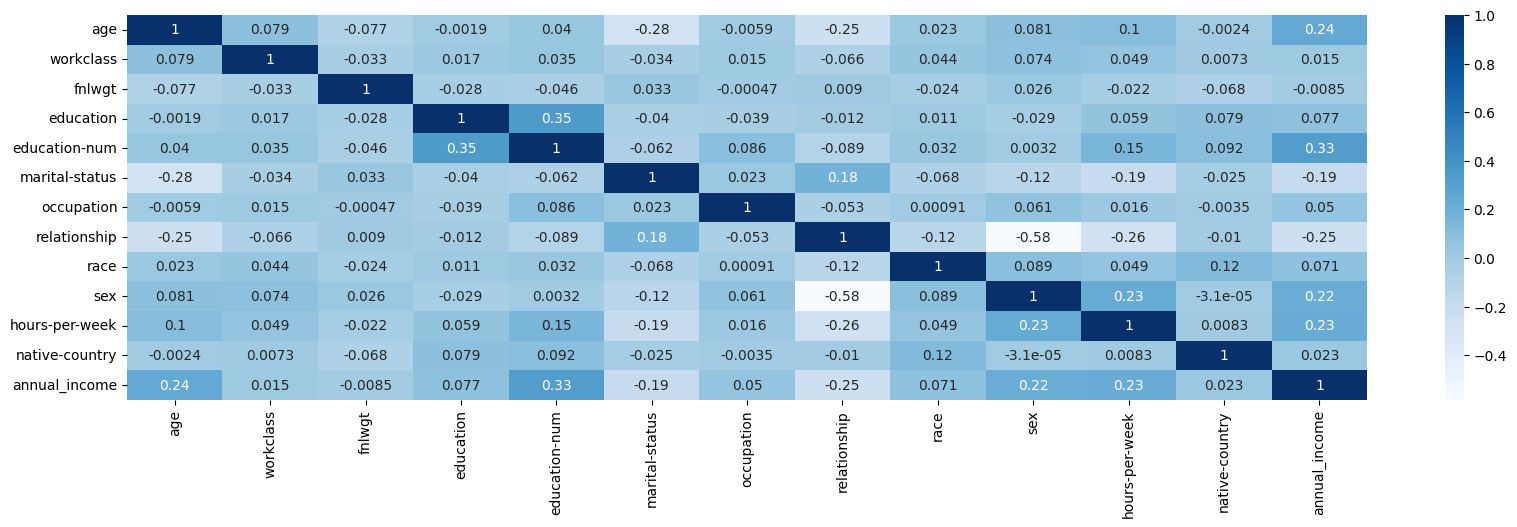

In [34]:
# Visualization of correlation between all columns
plt.figure(figsize=(20,5))
sns.heatmap(df1.corr(), annot=True, cmap='Blues')

<hr style = "height: 1px">

**Variance Inflation Factor**

VIF is used to show multicollinearity between different variables

<hr style = "height: 1px">

In [35]:
# Dividing the dataset into independent and dependent data before scaling
x = df1.drop('annual_income',axis=1)
y = df1['annual_income']

In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: annual_income, Length: 30008, dtype: int32

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns'] = x.columns
vif_dataframe['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,9.370536
1,workclass,6.233568
2,fnlwgt,4.075286
3,education,9.387554
4,education-num,18.822013
5,marital-status,4.013411
6,occupation,3.197344
7,relationship,2.618209
8,race,18.409002
9,sex,4.569290


In [39]:
# Dropping native-country
x = x.drop('native-country',axis=1)

In [40]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns'] = x.columns
vif_dataframe['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,8.915243
1,workclass,6.181988
2,fnlwgt,4.054628
3,education,9.228184
4,education-num,17.952979
5,marital-status,3.892262
6,occupation,3.186525
7,relationship,2.491658
8,race,15.965525
9,sex,4.494298


In [41]:
# Dropping race
x = x.drop('race',axis=1)

In [42]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns'] = x.columns
vif_dataframe['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,8.403482
1,workclass,6.054735
2,fnlwgt,4.000114
3,education,9.138689
4,education-num,17.234506
5,marital-status,3.800159
6,occupation,3.173731
7,relationship,2.430931
8,sex,4.361342
9,hours-per-week,12.089996


In [43]:
# Dropping education-num
x = x.drop('education-num',axis=1)

In [44]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns'] = x.columns
vif_dataframe['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,7.989581
1,workclass,5.973191
2,fnlwgt,3.978136
3,education,7.251089
4,marital-status,3.726095
5,occupation,3.082293
6,relationship,2.408322
7,sex,4.349662
8,hours-per-week,10.971461


In [45]:
# Dropping hours-per-week
x = x.drop('hours-per-week',axis=1)

In [46]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns'] = x.columns
vif_dataframe['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,7.057114
1,workclass,5.803160
2,fnlwgt,3.905168
3,education,6.673632
4,marital-status,3.710800
5,occupation,3.042754
6,relationship,2.386505
7,sex,3.981560


In [47]:
# Dropping the age
x = x.drop('age',axis=1)

In [48]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns'] = x.columns
vif_dataframe['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,workclass,5.209860
1,fnlwgt,3.812616
2,education,5.873597
3,marital-status,3.709943
4,occupation,2.965945
5,relationship,2.380738
6,sex,3.813915


In [49]:
# 6 columns have been dropped from the original dataset
df.shape, x.shape

((30008, 13), (30008, 7))

<hr style = "height: 1px">

# Data Visualisation

df1 was the dataset created after the Label Encoding step and has numerical values.

For Data Visualisation we will use the dataset 'df' which has also been cleaned and pre-processed but contains the original object and numeric datatype columns. This will enable us to visualise different columns.


<hr style = "height: 1px">

**DISTRIBUTION OF AGES**

<hr style = "height: 1px">

In [50]:
bins=[0,10,20,30,40,50,60,70,80,90,100]
labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

df2 = pd.cut(df['age'], bins=bins, labels=labels)

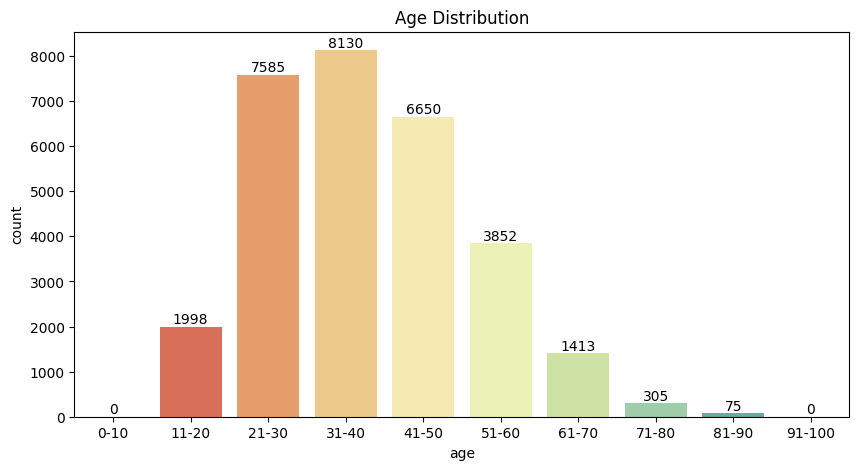

In [51]:
plt.figure(figsize=(10, 5))

graph1 = sns.countplot(x=df2, palette="Spectral")
graph1.bar_label(graph1.containers[0])

plt.title('Age Distribution')
plt.show()

**This graph shows the distribution of ages within the dataset. The graph shows most individuals fall within 31 to 40 years of age at 8,130 people. This number gradually declines until the 81 to 90 age range. The second most populous age range is 21 to 30.**

<hr style = "height: 1px">

**DISTRIBUTION OF PEOPLE BASED ON THEIR HIGHEST LEVEL OF EDUCATION**

<hr style = "height: 1px">

In [52]:
# Create new dataframe with number of people who studied at each education level
df3 = pd.DataFrame(df['education'].value_counts())
df3 = df3.reset_index()
df3 = df3.sort_values(by='index', ascending=True)
df3.head()

,index,education
7,10th,818
5,11th,1048
11,12th,377
14,1st-4th,151
13,5th-6th,288


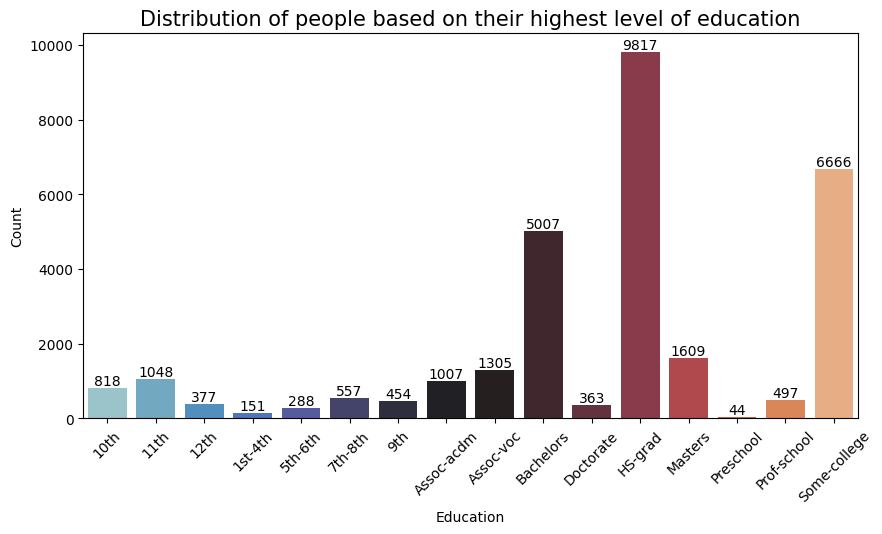

In [53]:
plt.figure(figsize=(10, 5))

graph2 = sns.barplot(x='index', y='education', data=df3, palette="icefire")
graph2.bar_label(graph2.containers[0])

plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of people based on their highest level of education', fontsize=15)
plt.show()

**This graph demonstrates the individuals within the dataset have a varied background of education levels. 9,817 people have ‘HS-grad’ as their highest education level which is the highest count. In terms of higher education, 5,007 people completed a ‘Bachelors’ degree, 1,609 people completed a ‘Masters’ degree and 363 people completed a ‘Doctorate’.**

<hr style = "height: 1px">

**NUMBER OF PEOPLE IN EACH OCCUPATION**

<hr style = "height: 1px">

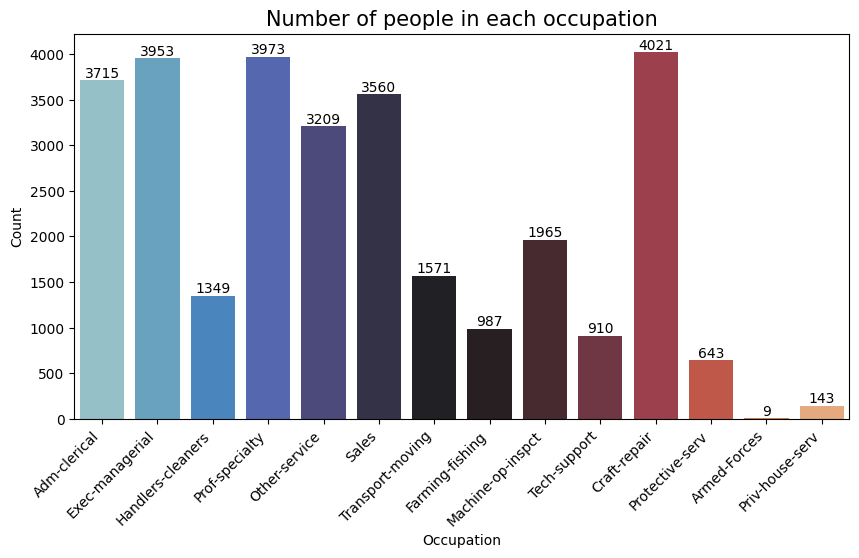

In [54]:
plt.figure(figsize=(10, 5))

graph3 = sns.countplot(x=df['occupation'], palette="icefire")
graph3.bar_label(graph3.containers[0])

plt.xticks(rotation=45, ha="right")
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title(label='Number of people in each occupation', fontsize=15)
plt.show()

**This graph shows the 3 occupations with the most employees are ‘Exec-managerial’, ‘Prof-specialty’ and ‘Craft-repair’ with 3,953, 3,973 and 4,021 individuals working in each respectively. The job with the least employees is ‘Armed-Forces’ where only 9 individuals are working.**

<hr style = "height: 1px">

**NUMBER OF PEOPLE WHO EARN MORE THAN 50K GROUPED BY THEIR OCCUPATION**

<hr style = "height: 1px">

In [55]:
df4 = df[df['annual_income']=='>50K']
df4 = pd.DataFrame(df4['occupation'].value_counts())
df4 = df4.reset_index()
df4 = df4.sort_values(by='index', ascending=True)
df4.head()

,index,occupation
4,Adm-clerical,492
12,Armed-Forces,1
3,Craft-repair,900
0,Exec-managerial,1899
10,Farming-fishing,115


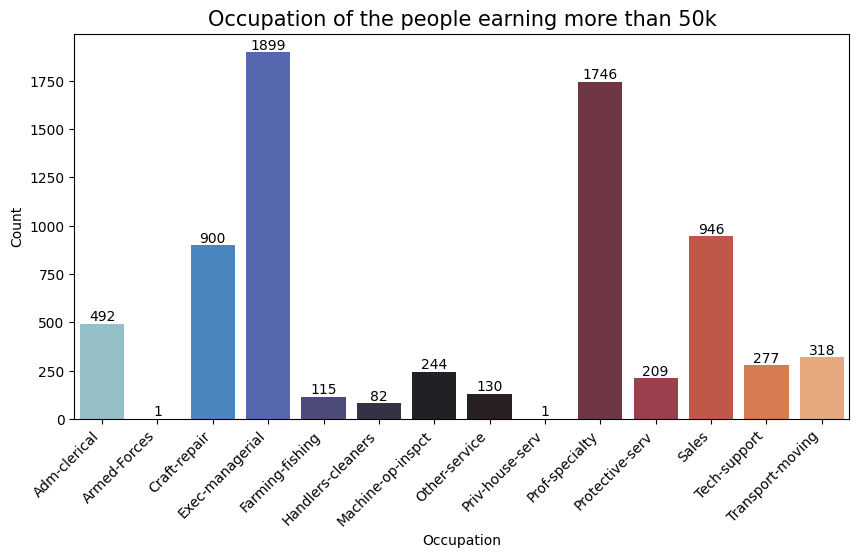

In [56]:
plt.figure(figsize=(10, 5))

graph4 = sns.barplot(x='index', y='occupation', data=df4, palette="icefire")
graph4.bar_label(graph4.containers[0])

plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation of the people earning more than 50k', fontsize=15)
plt.show()

**Following the previous graph plotted, the next step was to analyse which occupations have people earning over 50,000 annually. ‘Exec-managerial’ and ‘Prof-specialty’ have the most individuals earning over 50,000, at 1,899 and 1,746 people respectively. This is 48% and 44% of all people working within these occupations. ‘Exec-managerial’ (48%) has the highest percentage of employees earning a salary greater than 50,000. ‘Craft-repair’ has the highest number of total employees at 4,021 but only 22% of these people earn a salary greater than 50,000.**

<hr style = "height: 1px">

**NUMBER OF PEOPLE WHO EARN LESS THAN OR EQUAL TO 50K GROUPED BY THEIR OCCUPATION**

<hr style = "height: 1px">

In [57]:
df5 = df[df['annual_income']=='<=50K']
df5 = pd.DataFrame(df5['occupation'].value_counts())
df5 = df5.reset_index()
df5 = df5.sort_values(by='index', ascending=True)
df5.head()

,index,occupation
0,Adm-clerical,3223
13,Armed-Forces,8
1,Craft-repair,3121
5,Exec-managerial,2054
9,Farming-fishing,872


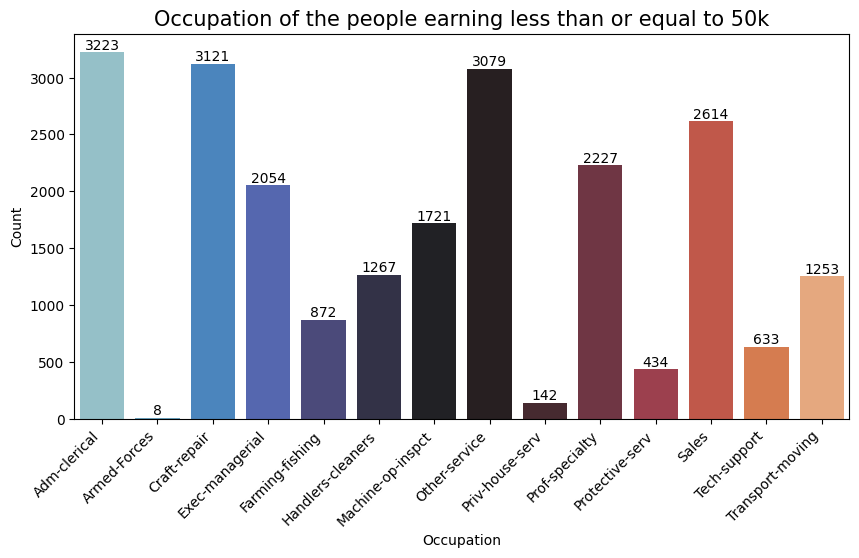

In [58]:
plt.figure(figsize=(10, 5))

graph5 = sns.barplot(x='index', y='occupation', data=df5, palette="icefire")
graph5.bar_label(graph5.containers[0])

plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation of the people earning less than or equal to 50k', fontsize=15)
plt.show()

**‘Adm-clerical’ have the most employees earning less than or equal to 50,000 at 3,223 people. This is 87% of their work force. ‘Priv-house-serv’ has the largest proportion of employees earning this salary at 98%. ‘Other-service’ has the second highest proportion at 96% (3,079 out of 3,209). Although the most people earning more than 50,000 were ‘Exec-managerial’ (1,899), the majority of their employees (52%) earn less than or equal to 50,000.**

<hr style = "height: 1px">

**NUMBER OF PEOPLE IN EACH WORKCLASS GROUPED BY ANNUAL INCOME**

<hr style = "height: 1px">

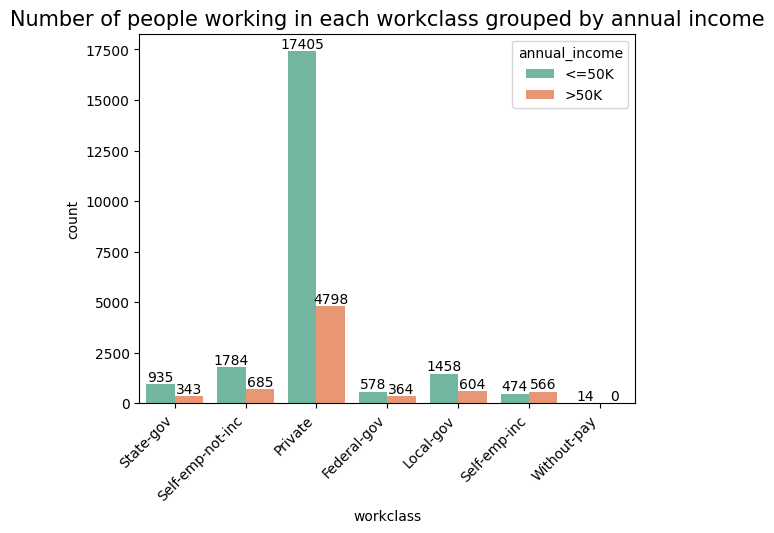

In [59]:
graph6 = sns.countplot(x='workclass', hue='annual_income', data=df, palette='Set2')
graph6.bar_label(graph6.containers[0])
graph6.bar_label(graph6.containers[1])

plt.xticks(rotation=45, ha='right')
plt.title('Number of people working in each workclass grouped by annual income', fontsize=15)
plt.show()

**The ‘Private’ workclass has the largest number of employees at 22,203. 17,405 (78%) of these people earn a salary less than or equal to 50,000. Excluding ‘Without-pay’, ‘Private’ is the highest proportion of a workclass earning less than or equal to 50,000. ‘State-gov’, ‘Self-emp-not-inc’ and ‘Local-gov’ have 73%, 72% and 71% of their employees earning this salary respectively. The ‘Private’ workclass has the highest number of employees (4,798) earning more than 50,000 but this is only 22% of their workforce. Self-emp-inc has the highest proportion of employees earning this salary at 54%.**

<hr style = "height: 1px">

**HOURS WORKED PER WEEK BASED ON THE AGES OF INDIVIDUALS**

<hr style = "height: 1px">

<AxesSubplot: xlabel='age', ylabel='hours-per-week'>

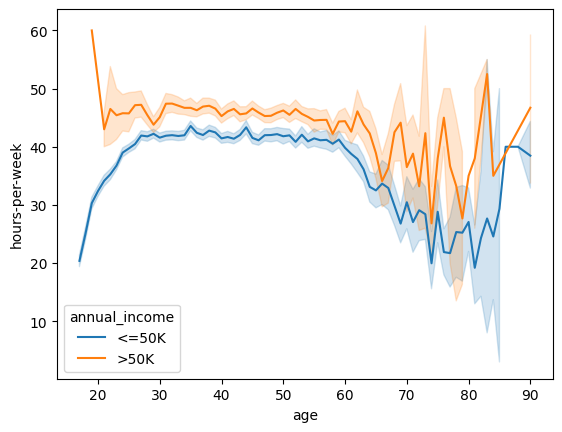

In [60]:
sns.lineplot(x='age',y='hours-per-week',data=df,hue='annual_income')

**This lineplot shows the average ‘hours-per-week’ value for each age separated based on their annual salary. The graph clearly shows the longer hours people work a week, the higher salary they make.**

<hr style = "height: 1px">

# Feature Scaling
<br>

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Split the data into testing and training datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [63]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<hr style = "height: 1px">

# Model Creation
<br>

**Problem Statement:** After having sufficient knowledge about the attributes, you will perform a predictive task of classification to predict whether an individual makes over 50,000 a year or less by using different machine learning algorithms.

Since this is a classification task, different classification models will be used and their accuracies compared to determined which model produces the most accurate output to address the problem statement.<br>

The 3 models used are:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier

<hr style = "height: 1px">

**1. LOGISTIC REGRESSION**

<hr style = "height: 1px">

In [64]:
# Importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [65]:
# Building the model
lo_model = LogisticRegression()

In [66]:
# Training the model
lo_model.fit(x_train,y_train)

LogisticRegression()

In [67]:
x_train

array([[-0.2036681 ,  0.15460613,  0.17385037, ..., -1.47992182,
         0.97906502, -1.43541923],
       [-0.2036681 ,  0.0544437 ,  0.17385037, ..., -1.47992182,
         0.97906502, -1.43541923],
       [-0.2036681 , -0.28829769,  0.17385037, ...,  0.25915009,
         1.60203563, -1.43541923],
       ...,
       [-0.2036681 , -0.41191763,  0.17385037, ..., -0.98304413,
        -0.88984679,  0.69666059],
       [-0.2036681 , -0.68942498, -1.13929922, ...,  1.25290547,
        -0.26687618,  0.69666059],
       [-0.2036681 ,  1.28556196, -0.35140946, ...,  0.75602778,
         0.97906502,  0.69666059]])

In [68]:
y_train 

23710    0
26768    0
14354    0
19810    1
8491     0
        ..
12163    1
28817    1
10067    0
31917    0
9562     0
Name: annual_income, Length: 24006, dtype: int32

In [69]:
y_pred_lo = lo_model.predict(x_test)
y_pred_lo = pd.DataFrame(y_pred_lo)
y_pred_lo

,0
0,0
1,0
2,0
3,0
4,0
...,...
5997,0
5998,0
5999,0
6000,0


In [70]:
# Finding the accuracy
accuracy_score(y_test,y_pred_lo)

0.7504165278240587

In [71]:
# Detecting correct predictions
confusion_matrix(y_test,y_pred_lo)

array([[4497,   22],
       [1476,    7]], dtype=int64)

In [72]:
(4497+7)/6002*100

75.04165278240586

In [73]:
# Printing the classification report
print(classification_report(y_test,y_pred_lo)) 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4519
           1       0.24      0.00      0.01      1483

    accuracy                           0.75      6002
   macro avg       0.50      0.50      0.43      6002
weighted avg       0.63      0.75      0.65      6002



<hr style = "height: 1px">

**LOGISTIC REGRESSION MODEL SUMMARY**

The Logistic model was able to provide predictions with a 75% accuracy. In the classification report above, the model correctly predicted salary ‘<=50K’ which is represented by 0 to a 75% precision and ‘>50K’ salaries to a 24% precision.

<hr style = "height: 1px">


<hr style = "height: 1px">

**2. DECISION TREE**

<hr style = "height: 1px">

In [74]:
# Importing the library
from sklearn.tree import DecisionTreeClassifier

In [75]:
# Building the model
dt_model = DecisionTreeClassifier()

In [76]:
# Training the model
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
# Prediction for annual income
y_pred_dt = dt_model.predict(x_test)

In [78]:
# Finding the accuracy
accuracy_score(y_test,y_pred_dt)

0.7584138620459847

In [79]:
# Hyperparameter Tuning with loop for best accuracy
param_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [80]:
for X in param_values:
    model = DecisionTreeClassifier(max_depth=X,random_state=67)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    print("max_depth=",X,"accuracy=",acc_score )

max_depth= 1 accuracy= 75.29156947684106
max_depth= 2 accuracy= 75.29156947684106
max_depth= 3 accuracy= 78.77374208597135
max_depth= 4 accuracy= 80.3565478173942
max_depth= 5 accuracy= 81.1562812395868
max_depth= 6 accuracy= 81.02299233588803
max_depth= 7 accuracy= 81.07297567477507
max_depth= 8 accuracy= 81.47284238587137
max_depth= 9 accuracy= 81.57280906364545
max_depth= 10 accuracy= 81.48950349883373
max_depth= 11 accuracy= 80.98967010996334
max_depth= 12 accuracy= 80.7897367544152
max_depth= 13 accuracy= 79.65678107297568
max_depth= 14 accuracy= 79.39020326557814
max_depth= 15 accuracy= 78.89036987670777


<br>

**To optimise the code we will use Grid Search CV**



In [81]:
# Importing the libraries
from sklearn.model_selection import GridSearchCV

In [82]:
# Defining the values for hyperparameters
param_grid = {
  "max_depth" : [None,5,7,10],
  "min_samples_split" : [2,5,10],
  "min_samples_leaf" : [1,2,4],
  "criterion" : ["gini", "entropy" ]

}
clf = DecisionTreeClassifier()

In [83]:
# Perform hyperparameter tuning for the model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3 ,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [84]:
# Find the best parameters for the model
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score:  0.8170040823127551


In [85]:
# Perform the model with optimized parameters
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=67, max_depth=5, min_samples_leaf=4, min_samples_split=2)

In [86]:
# Training the model
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=67)

In [87]:
# Testing the model
dt_pred = dt_model.predict(x_test)

In [88]:
y_test

7996     0
3954     0
16284    1
18809    1
2862     0
        ..
618      0
28060    0
2687     1
18933    0
22551    0
Name: annual_income, Length: 6002, dtype: int32

In [89]:
# Finding the accuracy
accuracy_score(dt_pred,y_test)

0.811896034655115

In [90]:
# Detecting correct predictions
confusion_matrix(y_test,dt_pred)

array([[4242,  277],
       [ 852,  631]], dtype=int64)

In [91]:
(4242+631)/6002*100

81.1896034655115

In [92]:
# Printing the classification report
print(classification_report(y_test,dt_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4519
           1       0.69      0.43      0.53      1483

    accuracy                           0.81      6002
   macro avg       0.76      0.68      0.71      6002
weighted avg       0.80      0.81      0.79      6002



<hr style = "height: 1px">

**DECISION TREE MODEL SUMMARY**

After being trained using the hyperparameters, the Decision Tree model gave a 81.2% accuracy. The classification report shows ‘<=50K’ values were identified with 83% precision and ‘>50K’ values with 69% precision.

<hr style = "height: 1px">


<hr style = "height: 1px">

**3. RANDOM FOREST**

<hr style = "height: 1px">

In [93]:
# Importing the libraries
from sklearn.ensemble import RandomForestClassifier

In [94]:
# Building the model
rf_model = RandomForestClassifier(n_estimators=50,random_state=23)

In [95]:
# Training the model
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=23)

In [96]:
# Prediction for annual income
y_pred_rf = rf_model.predict(x_test)

In [97]:
# Finding the accuracy
accuracy_score(y_test,y_pred_rf)

0.787237587470843

In [98]:
# The number of trees to be used in the model
n = [100,150,200,250,300,350,400,450,500,550,600,650,700]

In [99]:
# Finding the accuracy for each number of trees
for X in n:
    model = RandomForestClassifier(n_estimators=X,random_state=23)    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)*100
    print("no.of Trees=",X,"accuracy=",acc)

no.of Trees= 100 accuracy= 78.74041986004666
no.of Trees= 150 accuracy= 78.757080973009
no.of Trees= 200 accuracy= 78.74041986004666
no.of Trees= 250 accuracy= 78.69043652115961
no.of Trees= 300 accuracy= 78.79040319893369
no.of Trees= 350 accuracy= 78.74041986004666
no.of Trees= 400 accuracy= 78.79040319893369
no.of Trees= 450 accuracy= 78.80706431189604
no.of Trees= 500 accuracy= 78.77374208597135
no.of Trees= 550 accuracy= 78.80706431189604
no.of Trees= 600 accuracy= 78.85704765078307
no.of Trees= 650 accuracy= 78.82372542485838
no.of Trees= 700 accuracy= 78.85704765078307


In [100]:
# Defining the values for hyperparameters
param_grid = {
    "n_estimators" : [100,300,500,700],
    "max_depth" : [None,5,10],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4],
    "criterion" : ["gini", "entropy" ]
}

In [101]:
# Importing the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier2 = RandomForestClassifier(random_state = 23)

In [102]:
# Perform hyperparameter tuning for the model
grid_search = GridSearchCV(estimator = classifier2, param_grid = param_grid, cv = 2 )
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500, 700]})

In [103]:
# Find the best parameters for the model
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [104]:
# Building the model with best parameters
new_model=RandomForestClassifier(criterion='gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100,random_state=23)

In [105]:
# Training the model
new_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=23)

In [106]:
# Prediction of the model
new_pred=new_model.predict(x_test)
new_pred= pd.DataFrame(new_pred)
new_pred

,0
0,0
1,0
2,0
3,1
4,0
...,...
5997,1
5998,0
5999,1
6000,0


In [107]:
# Finding the accuracy score
accuracy_score(y_test,new_pred)

0.8263912029323559

In [108]:
# Detecting correct predictions
confusion_matrix(y_test,new_pred)

array([[4168,  351],
       [ 691,  792]], dtype=int64)

In [109]:
(4168+792)/6002*100

82.63912029323559

In [110]:
# Printing the classification report
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4519
           1       0.69      0.53      0.60      1483

    accuracy                           0.83      6002
   macro avg       0.78      0.73      0.75      6002
weighted avg       0.82      0.83      0.82      6002



<hr style = "height: 1px">

**RANDOM FOREST MODEL SUMMARY**

After being trained with the hyperparameters, the Random Forest model gave an accuracy of 82.6%. The classification report shows ‘<=50K’ values were identified with 86% precision and ‘>50K’ values with 69% precision.

<hr style = "height: 1px">

<hr style='height:1px'>

**FINAL CONCLUSION**

The **RANDOM FOREST CLASSIFIER** model provides an accuracy of 82.6% for the data which is the best of the 3 models.

This model provides predictions of the highest accuracy.

<hr style='height:1px'>
